# ch4 作业

**作业目录**：

* [Task 1](#1. 基于矩阵乘法实现单隐层神经网络)
* [Task 2](#2. 使用 tf.layers.dense 替换矩阵乘法)
* [Task 3](#3. 理解 word embedding 的工作原理)

### 环境说明：

In [1]:
%load_ext watermark
%watermark -a 'Scott Ming' -v -m -d -p numpy,pandas,matplotlib,tensorflow

Scott Ming 2017-03-31 

CPython 3.5.2
IPython 5.2.2

numpy 1.12.1
pandas 0.19.2
matplotlib 2.0.0
tensorflow 1.0.1

compiler   : GCC 4.9.2
system     : Linux
release    : 3.16.0-4-amd64
machine    : x86_64
processor  : 
CPU cores  : 4
interpreter: 64bit


## 1. 基于矩阵乘法实现单隐层神经网络


Ch3 已经实现该任务：[ch3-asgn#3](../../ch3/code/3w-asgn.ipynb#3.2.2-%E5%8D%95%E9%9A%90%E5%B1%82%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C) 。

## 2. 使用 tf.layers.dense 替换矩阵乘法

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib.colors import ListedColormap

读取数据

In [3]:
data = pd.read_csv('data.csv', names='x1 x2 y'.split())
neg = data[data.y == 0]
pos = data[data.y == 1]

p = 0.8
shuffled_index = np.random.permutation(data.index)
data = data.iloc[shuffled_index]  # 打乱数据

train = data.iloc[:int(data.shape[0] * p), :]
test  = data.iloc[int(data.shape[0] * p):, :]

X = train.iloc[:, :2].values  # 160 * 2
Y = train.iloc[:, 2:].values  # 160 * 1
X_t = test.iloc[:, :2].values  # 40 * 2
Y_t = test.iloc[:, 2:].values  # 40 * 1

#### 1. 定义神经网络的结果和前向传播的输出结果

In [4]:
batch_size = 8
# w1= tf.Variable(tf.random_normal([2, 4], stddev=1, seed=1))
# w2= tf.Variable(tf.random_normal([4, 1], stddev=1, seed=1))
# b1 = tf.Variable(tf.random_normal([1], stddev=1, seed=1))
# b2 = tf.Variable(tf.random_normal([1], stddev=1, seed=1))
x = tf.placeholder(tf.float32, shape=(None, 2), name="x-input")
y_= tf.placeholder(tf.float32, shape=(None, 1), name='y-input')

#### 2. 定义前向传播过程，损失函数及反向传播算法。

In [5]:
a = tf.layers.dense(inputs=x, units=4, activation=tf.nn.tanh)
y = tf.layers.dense(inputs=a, units=1, activation=tf.sigmoid)

In [6]:
# a = tf.nn.tanh(tf.matmul(x, w1) + b1)  # 隐层用 tanh
# y = tf.sigmoid(tf.matmul(a, w2) + b2)  # 输出层用 sigmoid

# 定义损失函数
cross_entropy = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(logits=y, labels=y_)
)

# cross_entropy = - tf.reduce_mean(y_ * tf.log(tf.clip_by_value(y, 1e-10, 1.0)))  # 这个为什么不行呢？
train_step = tf.train.AdamOptimizer(0.01).minimize(cross_entropy)

In [7]:
# 定义一个判断 accuracy 的函数
def accuracy(preds, labels):
    return ((preds > 0.5) == labels).sum() / float(len(labels))

# 定义一个画决策界面的函数
def plot_decision_regions(X, y_, y, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y_))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    Z = sess.run(y, feed_dict={x:grid})
    # Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    y_ = y_.reshape((X.shape[0],))
    for idx, cl in enumerate(np.unique(y_)):
        plt.scatter(x=X[y_ == cl, 0], y=X[y_ == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

#### 3. 创建一个会话来运行TensorFlow程序。



After 0 training step(s), cross entropy on all data is 0.735619, Trian accuracy is 0.53, Test accuracy is 0.45
After 1000 training step(s), cross entropy on all data is 0.576954, Trian accuracy is 0.99, Test accuracy is 0.97
After 2000 training step(s), cross entropy on all data is 0.536214, Trian accuracy is 1.00, Test accuracy is 0.97
After 3000 training step(s), cross entropy on all data is 0.526447, Trian accuracy is 1.00, Test accuracy is 1.00
After 4000 training step(s), cross entropy on all data is 0.521806, Trian accuracy is 1.00, Test accuracy is 1.00
After 5000 training step(s), cross entropy on all data is 0.519071, Trian accuracy is 1.00, Test accuracy is 1.00
After 6000 training step(s), cross entropy on all data is 0.517311, Trian accuracy is 1.00, Test accuracy is 1.00
After 7000 training step(s), cross entropy on all data is 0.516111, Trian accuracy is 1.00, Test accuracy is 1.00
After 8000 training step(s), cross entropy on all data is 0.515260, Trian accuracy is 1.0

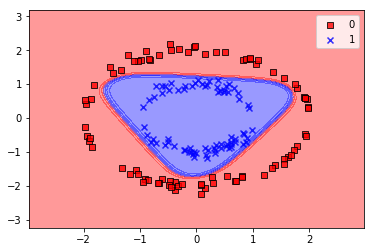

In [8]:
with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    
    # 输出目前（未经训练）的参数取值。
#     print("w1:", sess.run(w1))
#     print("w2:", sess.run(w2))
    print("\n")
    # 训练模型。
    STEPS = 10000
    for i in range(STEPS):
        start = (i*batch_size) % 160
        end = (i*batch_size) % 160 + batch_size
        sess.run(train_step, feed_dict={x: X[start:end], y_: Y[start:end]})
        if i % 1000 == 0:
            total_cross_entropy = sess.run(cross_entropy, feed_dict={x: X, y_: Y})
            trian_output = sess.run(y, feed_dict={x: X, y_: Y})
            train_accuracy = accuracy(trian_output, Y)
            test_output = sess.run(y, feed_dict={x: X_t, y_: Y_t})
            test_accuracy = accuracy(test_output, Y_t)
            print("After %d training step(s), cross entropy on all data is "
                  "%3f, Trian accuracy is %.2f, Test accuracy is %.2f" % (
                      i, total_cross_entropy, train_accuracy, test_accuracy))
    # 输出训练后的参数取值。
#     print("\n")
#     print("w1:", sess.run(w1))
#     print("w2:", sess.run(w2))
    plot_decision_regions(X, Y, y)
    plt.legend(loc=0)
    plt.show()

## 3. 理解 word embedding 的工作原理

说白了 lookup 就是一种索引的方式，跟 numpy.array 的索引没什么区别，这里直接用 numpy 来演示，
[参考](http://stackoverflow.com/questions/34870614/what-does-tf-nn-embedding-lookup-function-do)

In [9]:
import numpy as np

In [10]:
np.random.seed(1)
a = np.random.uniform(size=(3, 3))

In [11]:
a

array([[  4.17022005e-01,   7.20324493e-01,   1.14374817e-04],
       [  3.02332573e-01,   1.46755891e-01,   9.23385948e-02],
       [  1.86260211e-01,   3.45560727e-01,   3.96767474e-01]])

In [12]:
word = np.asarray([0, 0, 1])

矩阵乘法形式：

In [13]:
word.dot(a)

array([ 0.18626021,  0.34556073,  0.39676747])

look_up 抽行形式：

In [14]:
a[2, :]

array([ 0.18626021,  0.34556073,  0.39676747])

└两种方式显而易见是一样的